In [1]:
import requests
import json
import pandas as pd
import matplotlib
from config import CORDRA_BACKEND_BASE_URL, CORDRA_USER, CORDRA_PASSWORD

EVALUATED_BACKEND_URL = "https://nfdi4earth-knowledgehub.geo.tu-dresden.de/api"

def get_evaluation_results():
    url = CORDRA_BACKEND_BASE_URL + "/search/?query=type:\"RepositoryEvalForLabel\""
    eval_results = requests.get(url, auth=requests.auth.HTTPBasicAuth(CORDRA_USER, CORDRA_PASSWORD)).json()["results"]
    return eval_results
    
def get_repository_titles():
    url = EVALUATED_BACKEND_URL + "/search/"
    titles = requests.post(url, headers={"Content-type":"application/json"}, data=json.dumps({
        "query": "type:\"Repository\"",
        "filter": [
            "/content/dct:title",
            "/content/@id"
        ]
    })).json()["results"]
    titles_as_dict = {x["content"]["@id"]: x["content"]["dct:title"]["@value"] for x in titles}
    return titles_as_dict
    
eval_results = get_evaluation_results()
titles = get_repository_titles()

In [2]:
# build a table-like structure
result_table = []
for eval_result in eval_results:
    repo_id = eval_result["content"]["n4e:repository"].replace(EVALUATED_BACKEND_URL + "/objects/", "")
    row = {
        "id": repo_id,
        "title": titles[repo_id]
    }
    total = 0
    for key,val in eval_result["content"]["results"].items():
        row[key] = val["result"]
        if val["result"]:
            total += 1
    row["total_score"] = total
    result_table.append(pd.Series(row))
result_table = pd.DataFrame(result_table)
result_table

id  \
0    n4ekh/ea38cbbb8cd6858a98a0   
1    n4ekh/ec4ba94ef2b185d2e210   
2    n4ekh/7617e86d031aeb6e58f7   
3    n4ekh/76ef9d3573364c2cb8ca   
4    n4ekh/1c67cc09199c9fd2e9cb   
..                          ...   
164  n4ekh/7617e86d031aeb6e58f7   
165  n4ekh/76ef9d3573364c2cb8ca   
166  n4ekh/1c67cc09199c9fd2e9cb   
167  n4ekh/a29eafe528c6680bab19   
168  n4ekh/6ed73973acbb77fabd6b   

                                                 title  \
0                Historical hydrographic data from BSH   
1                                               GeoReM   
2                               GIS Maps Portal at AWI   
3                                                 RESA   
4                                        HALO database   
..                                                 ...   
164                             GIS Maps Portal at AWI   
165                                               RESA   
166                                      HALO database   
167  Satellite Application Facility on Climate Moni...   
168       International Service of Geomagnetic Indices   

     n4e:assignsPersistentIds  n4e:assignsUniqueIds  n4e:providesAnyAPI  \
0                       False                 False                True   
1                       False                 False               False   
2                       False                 False               False   
3                       False                 False               False   
4                       False                 False                True   
..                        ...                   ...                 ...   
164                     False                 False               False   
165                     False                 False               False   
166                     False                 False                True   
167                      True                  True                True   
168                     False                 False               False   

     n4e:supportsApisHarvestable  n4e:supportsCrossDomainStandard  \
0                          False                            False   
1                          False                            False   
2                          False                             True   
3                          False                            False   
4                           True                            False   
..                           ...                              ...   
164                        False                             True   
165                        False                            False   
166                         True                            False   
167                        False                            False   
168                        False                            False   

     n4e:supportsMetadataStandardsByScientificDomain  total_score  
0                                              False            1  
1                                              False            0  
2                                              False            1  
3                                              False            0  
4                                              False            2  
..                                               ...          ...  
164                                            False            1  
165                                            False            0  
166                                            False            2  
167                                            False            3  
168                                            False            0  

[169 rows x 9 columns]

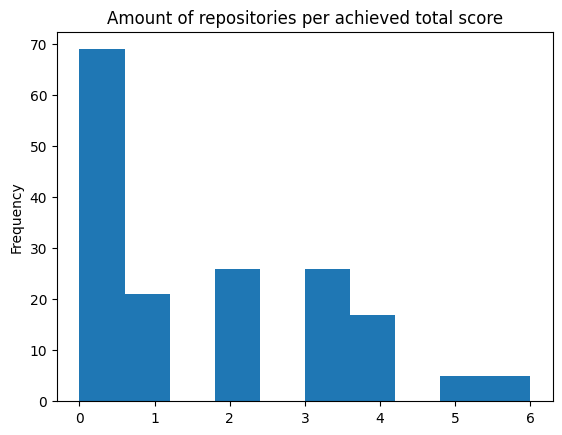

In [3]:
x =result_table["total_score"].plot(kind="hist", title="Amount of repositories per achieved total score")

In [4]:
print("Top 20 repositories")
result_table[["id","title","total_score"]].sort_values("total_score", ascending=False)[:20]

Top 20 repositories


id                                    title  \
114  n4ekh/b6a1cf21a45d9c966cec        British Oceanographic Data Centre   
90   n4ekh/f58849c1a632ca616bc5                         World Stress Map   
40   n4ekh/f1107f98e2af54c10b0d            World Data Center for Climate   
24   n4ekh/4f79d59381c8ef4ff479                                  PANGAEA   
124  n4ekh/90b0f4a2e85ef2cc0bbb              Earthdata powered by EOSDIS   
105  n4ekh/8d087b7b85f92e47ce33                                  heiDATA   
56   n4ekh/998e82dd47ef0b9d39e1                        GFZ Data Services   
126  n4ekh/4d8bf5694de7d8715ae2                                   B2FIND   
161  n4ekh/2079807dc6d1f094190e                                   Zenodo   
77   n4ekh/c8df2c6bf5e000b3f59f                  Open Data LMU - Physics   
146  n4ekh/477a56a5932ea35fe981        National Snow and Ice Data Center   
16   n4ekh/c69d21b5ec606429bc94                                   GEOFON   
23   n4ekh/2534ac10affa434f7aa4                                 bonndata   
152  n4ekh/c917de540bce37debb9b               Rolling Deck to Repository   
38   n4ekh/3740364ea9aee6cb7f9f               OceanRep GEOMAR Repository   
155  n4ekh/42a0b31886249a38e91e                                  BacDive   
41   n4ekh/749030bc0912093ee3e7  B2SHARE Server Forschungszentrum Jülich   
51   n4ekh/c4fe73cfe9692513264f                 Datenrechercheportal UFZ   
125  n4ekh/407bbdc5b33907072303                                  B2SHARE   
131  n4ekh/f8f913b96f7e61f75f76                         GAVO Data Centre   

     total_score  
114            6  
90             6  
40             6  
24             6  
124            6  
105            5  
56             5  
126            5  
161            5  
77             5  
146            4  
16             4  
23             4  
152            4  
38             4  
155            4  
41             4  
51             4  
125            4  
131            4

In [5]:
result_table[result_table["id"] == "n4ekh/f1107f98e2af54c10b0d"]

id                          title  \
40  n4ekh/f1107f98e2af54c10b0d  World Data Center for Climate   

    n4e:assignsPersistentIds  n4e:assignsUniqueIds  n4e:providesAnyAPI  \
40                      True                  True                True   

    n4e:supportsApisHarvestable  n4e:supportsCrossDomainStandard  \
40                         True                             True   

    n4e:supportsMetadataStandardsByScientificDomain  total_score  
40                                             True            6

In [6]:
metric_names = [x for x in result_table.columns if x not in ["id", "title", "total_score"]]
count_per_metrics = {}
for x in metric_names: 
    count_per_metrics[x] = result_table[x].value_counts().loc[True]

<Axes: title={'center': 'Number of repositories that fulfill a metric'}>

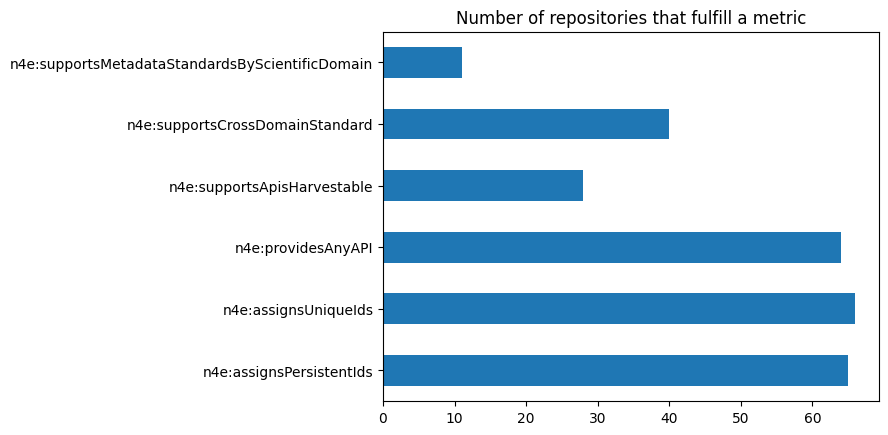

In [7]:
pd.Series(count_per_metrics).plot(kind="barh", title="Number of repositories that fulfill a metric")